In [1]:
import matplotlib.pyplot as plt
import mysql.connector

class Database:
    Database = None
    Cursor = None

    def Initialize():
        Database.Database = mysql.connector.connect(
            host="localhost",
            user="WSN",
            password="wsn123", 
            database='CTMCS',
            auth_plugin='mysql_native_password'
        )
        
        Database.Cursor = Database.Database.cursor()

    def Execute(query):
            Database.Cursor.execute(query)
            myresult = Database.Cursor.fetchall()
            
            ret = []
            for res in myresult:
                ret.append(res)

            return ret
    
def ListOfTuplesToLists(input):
     return list(map(list, zip(*input)))

Database.Initialize()

In [2]:
def GetDataDeltaVSTime(simulation_id = 1, max_level = 2):
    time = ListOfTuplesToLists(Database.Execute(d'''select result.TotalCollectionTime, result.TotalDataSentToBS from 
                       result where result.SimulationID = {simulation_id} order by result.ResultID'''))
    
    deltaLevel = [ListOfTuplesToLists(Database.Execute(f'''select (1.0 / CTMCParameter.Value_) from result inner join CTMCParameter on result.SimulationID = CTMCParameter.SimulationID
                       and result.ResultID = CTMCParameter.ResultID and CTMCParameter.Type_ = 'Delta' and CTMCParameter.Level_ = {level} and result.SimulationID = {simulation_id} order by result.ResultID'''))[0] 
                       for level in range(max_level + 1)]
    
    return time, deltaLevel

def Plot2DScatterDeltaVSTime(time, deltadata, delta):
    plt.title(f'Delta Level {delta} VS CollectionTime and DataSentToBS')
    plt.xlabel(f'Delta Level {delta}')
    plt.ylabel('Time')
    plt.scatter(deltadata, time[0])
    plt.scatter(deltadata, time[1])
    plt.legend(['TotalCollectionTime', 'TotalDataSentToBS'])
    plt.show()

def Plot3DScatterDeltaVSTime(timeCollectedOrSent, delta1data, delta2data, zlabel, delta1 = 0, delta2 = 1):
    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')
    ax.scatter(delta1data, delta2data, timeCollectedOrSent)
    #ax.plot_wireframe(delta1data, delta2data, timeCollectedOrSent)
    ax.set_xlabel(f'Delta Level {delta1}')
    ax.set_ylabel(f'Delta Level {delta2}')
    ax.set_zlabel(zlabel)

    plt.show()


def Plot3DScatterDeltaVSTimeBoth(time, delta1data, delta2data, delta1 = 0, delta2 = 1):
    fig = plt.figure()

    ax = fig.add_subplot(projection='3d')
    #ax.scatter(delta1data + delta1data, delta2data + delta2data, time[0] + time[1], marker=['o' for i in range(len(delta1data))] + ['^' for i in range(len(delta1data))])
    ax.scatter(delta1data, delta2data, time[0], marker='o')
    ax.scatter(delta1data, delta2data, time[1], marker='^')
    #ax.plot_wireframe(delta1data, delta2data, timeCollectedOrSent)
    ax.set_xlabel(f'Delta Level {delta1}')
    ax.set_ylabel(f'Delta Level {delta2}')
    ax.set_zlabel('Time')

    plt.show()



In [9]:
time, deltaLevel = GetDataDeltaVSTime(2, 1)

In [6]:
len(deltaLevel[2])
len(time[0])

IndexError: list index out of range

ValueError: x and y must be the same size

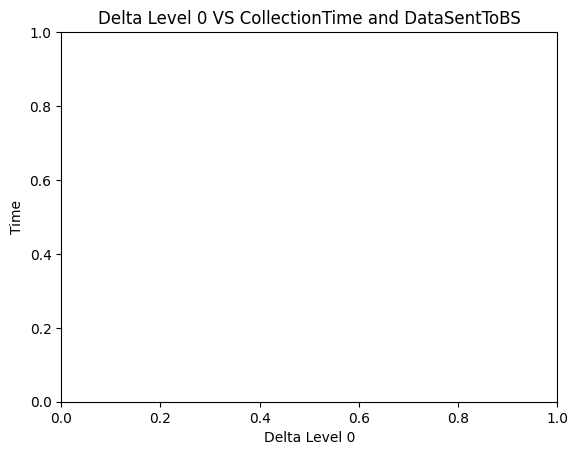

In [10]:
Plot2DScatterDeltaVSTime(time, deltaLevel[0], 0)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (72,) and arg 2 with shape (648,).

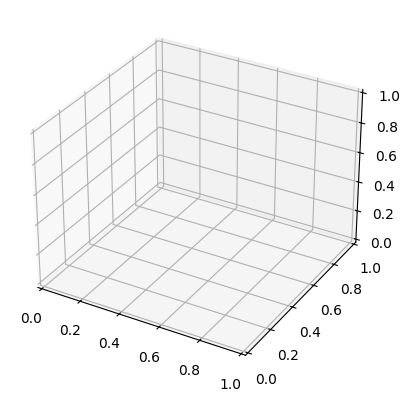

In [11]:
Plot3DScatterDeltaVSTime(time[0], deltaLevel[0], deltaLevel[1], 'CollectionTime', 0, 1)
Plot3DScatterDeltaVSTime(time[1], deltaLevel[0], deltaLevel[1], 'TotalDataSentToBS', 0, 1)

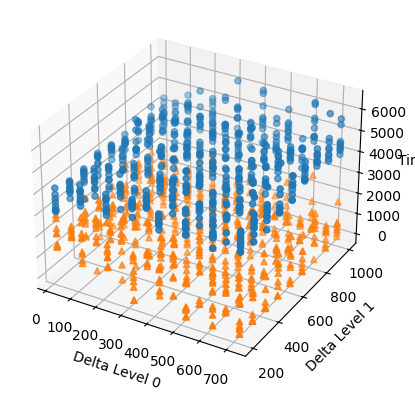

In [ ]:
Plot3DScatterDeltaVSTimeBoth(time, deltaLevel[0], deltaLevel[1], 0, 1)